In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 
from sklearn import metrics 
import xgboost as xgb 

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

import warnings 
warnings.filterwarnings("ignore")


# With Given Features

In [2]:
features = pd.read_csv('features_processed.csv')
labels = pd.read_csv('labels_processed.csv')

# Naive Bayes

## category classification

In [3]:
X = features.values
y = labels.category.replace('mountain', 0).replace('sea', 1).replace('jungle', 2).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.40      0.52       349
           1       0.47      0.82      0.59       357
           2       0.66      0.45      0.54       320

    accuracy                           0.56      1026
   macro avg       0.63      0.56      0.55      1026
weighted avg       0.63      0.56      0.55      1026



In [5]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['mountain', 'sea', 'jungle'], columns=['mountain', 'sea', 'jungle'])
print(conf_mat)

          mountain  sea  jungle
mountain       139  173      37
sea             27  291      39
jungle          15  160     145


## model classification

In [6]:
X = features.values
y = labels.model.replace('none', 0).replace('stable', 1).replace('dalle', 2).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       516
           1       0.69      0.90      0.78       261
           2       0.82      0.58      0.68       249

    accuracy                           0.87      1026
   macro avg       0.84      0.82      0.82      1026
weighted avg       0.88      0.87      0.87      1026



In [8]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['none', 'stable', 'dalle'], columns=['none', 'stable', 'dalle'])
print(conf_mat)

        none  stable  dalle
none     512       0      4
stable     0     234     27
dalle      0     104    145


## type classification

In [9]:
X = features.values
y = labels.type.replace('real', 0).replace('fake', 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       505
           1       0.99      1.00      1.00       521

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026



In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['real', 'fake'], columns=['real', 'fake'])
print(conf_mat)

      real  fake
real   502     3
fake     0   521


# SVM

## category classification

In [12]:
X = features.values
y = labels.category.replace('mountain', 0).replace('sea', 1).replace('jungle', 2).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       330
           1       0.72      0.82      0.76       355
           2       0.89      0.77      0.83       341

    accuracy                           0.78      1026
   macro avg       0.79      0.78      0.78      1026
weighted avg       0.79      0.78      0.78      1026



In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['mountain', 'sea', 'jungle'], columns=['mountain', 'sea', 'jungle'])
print(conf_mat)

          mountain  sea  jungle
mountain       246   66      18
sea             49  290      16
jungle          28   49     264


## model classification

In [15]:
X = features.values
y = labels.model.replace('none', 0).replace('stable', 1).replace('dalle', 2).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       517
           1       0.71      0.97      0.82       263
           2       0.94      0.58      0.72       246

    accuracy                           0.89      1026
   macro avg       0.88      0.85      0.84      1026
weighted avg       0.91      0.89      0.88      1026



In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['none', 'stable', 'dalle'], columns=['none', 'stable', 'dalle'])
print(conf_mat)

        none  stable  dalle
none     514       2      1
stable     0     255      8
dalle      1     102    143


## type classification

In [18]:
X = features.values
y = labels.type.replace('real', 0).replace('fake', 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      1.00      1.00       515

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026



In [20]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=['real', 'fake'], columns=['real', 'fake'])
print(conf_mat)

      real  fake
real   509     2
fake     2   513


# With Extracted Features

In [21]:
edge_features = pd.read_csv('data/clean_data/edge_cleaned.csv', index_col=0)
fourier_features = pd.read_csv('data/clean_data/fourier_cleaned.csv', index_col=0)
gabor_features = pd.read_csv('data/clean_data/gabor_cleaned.csv', index_col=0)
hist_features = pd.read_csv('data/clean_data/hist_cleaned.csv', index_col=0)
hog_features = pd.read_csv('data/clean_data/hog_cleaned.csv', index_col=0)
features = pd.concat([edge_features, fourier_features, gabor_features, hist_features, hog_features], axis=1).values
labels = pd.read_csv('data/clean_data/labels_cleaned.csv', index_col=0).values.squeeze()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [23]:
class TrainModel:
    def __init__(self, params_opt: list) -> None:
        self.params_opt = params_opt 
        
    def fine_tune(self, model, params, x_train, y_train):
        grid = GridSearchCV(model, params)
        grid.fit(x_train, y_train)
        self.model = grid.best_estimator_ 
        
    def classifier_report(self, x_test, y_test):
        print(classification_report(y_test, self.model.predict(x_test)))
        
    def plot_confusion_matrix(self, x_test, y_test):
        ConfusionMatrixDisplay(confusion_matrix(y_test, self.model.predict(x_test))).plot()
        
    def __call__(self, models, x_train, x_test, y_train, y_test):
        list_models = []
        for i in range(len(models)):
            self.fine_tune(models[i], self.params_opt, x_train, y_train)
            print(f"model {i} report is written below")
            self.classifier_report(x_test, y_test)

            print(f"now you can see model {i} confusion matrix")
            self.plot_confusion_matrix(x_test, y_test)
            
            list_models.append(self.model)
        return accuracy_score(y_test, self.model.predict(x_test)), self.model

# Logistic Regression 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       537
           1       0.69      0.75      0.72       489

    accuracy                           0.72      1026
   macro avg       0.72      0.72      0.72      1026
weighted avg       0.73      0.72      0.72      1026

now you can see model 0 confusion matrix


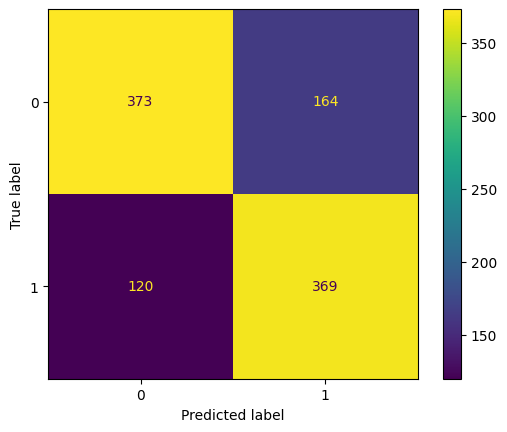

In [24]:
params = {"penalty": ["l1", "l1"], "solver": ['lbfgs', 'liblinear']}
lr = LogisticRegression(random_state=42)

acc_lr, lr_best_model = TrainModel(params)([lr], x_train, x_test, y_train, y_test)

In [44]:
lr_best_model

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

# XGboost model 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       537
           1       0.70      0.76      0.73       489

    accuracy                           0.73      1026
   macro avg       0.73      0.73      0.73      1026
weighted avg       0.73      0.73      0.73      1026

now you can see model 0 confusion matrix


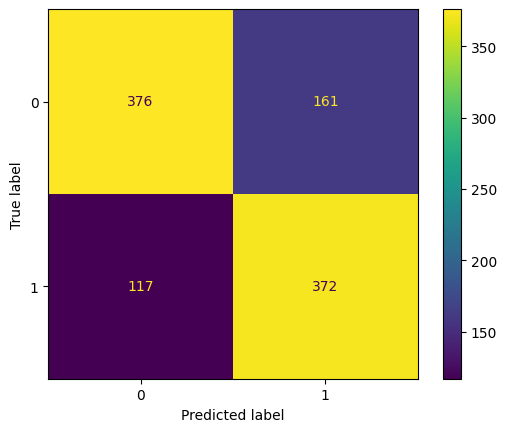

In [25]:
params = {"max_depth": np.arange(3, 8, 3), 
          "n_estimators": np.arange(100, 2000, 500), 
          "learning_rate": [0.01, 0.1], 
          }

xg = xgb.XGBClassifier(tree_method="gpu_hist", objective="binary:logistic")

acc_xg, xg_best_model = TrainModel(params)([xg], x_train, x_test, y_train, y_test)

In [45]:
xg_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# SVM 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       537
           1       0.74      0.77      0.76       489

    accuracy                           0.77      1026
   macro avg       0.76      0.77      0.76      1026
weighted avg       0.77      0.77      0.77      1026

now you can see model 0 confusion matrix


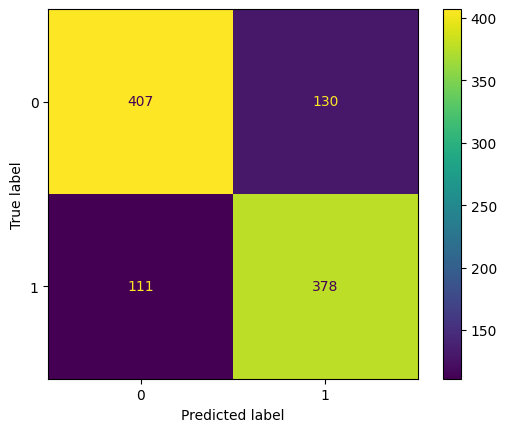

In [26]:
params = {"kernel": ["linear", "rbf", "poly"], 
          "C": [1, 4, 9], 
          "gamma": [0.7, 1.4, 2.8, 5.6]}
svm = SVC()
acc_svm, svm_best_model = TrainModel(params)([svm], x_train, x_test, y_train, y_test)

In [46]:
svm_best_model

SVC(C=9, gamma=0.7)

# KNN

model 0 report is written below
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       537
           1       0.62      0.67      0.64       489

    accuracy                           0.65      1026
   macro avg       0.65      0.65      0.65      1026
weighted avg       0.65      0.65      0.65      1026

now you can see model 0 confusion matrix


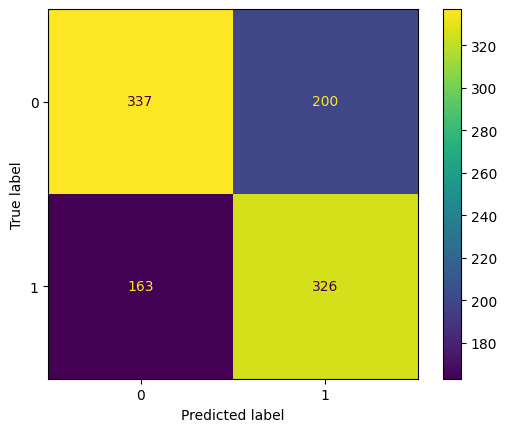

In [27]:
params = {"n_neighbors": np.arange(3, 33, 3)}
knn = KNeighborsClassifier()
acc_knn, knn_best_model = TrainModel(params)([knn], x_train, x_test, y_train, y_test)

In [47]:
knn_best_model

KNeighborsClassifier(n_neighbors=6)

# Decision Tree 

model 0 report is written below
              precision    recall  f1-score   support

           0       0.65      0.50      0.57       537
           1       0.56      0.70      0.63       489

    accuracy                           0.60      1026
   macro avg       0.61      0.60      0.60      1026
weighted avg       0.61      0.60      0.60      1026

now you can see model 0 confusion matrix


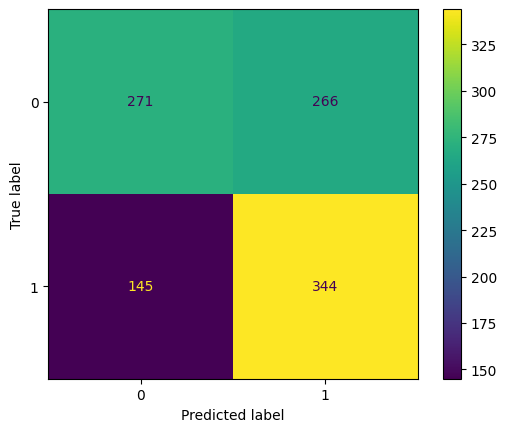

In [28]:
params = {"max_depth": [1, 3, 5] 
          }

dt = DecisionTreeClassifier(random_state=0)
acc_dt, dt_best_model = TrainModel(params)([dt], x_train, x_test, y_train, y_test)

In [49]:
dt_best_model

DecisionTreeClassifier(max_depth=3, random_state=0)

# Analysis on models and features

## ROC Curve

In [32]:
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, lr_best_model.predict(x_test))
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, knn_best_model.predict(x_test))
fpr_xg, tpr_xg, thresholds = metrics.roc_curve(y_test, xg_best_model.predict(x_test))
fpr_dt, tpr_dt, thresholds = metrics.roc_curve(y_test, dt_best_model.predict(x_test))
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, svm_best_model.predict(x_test))

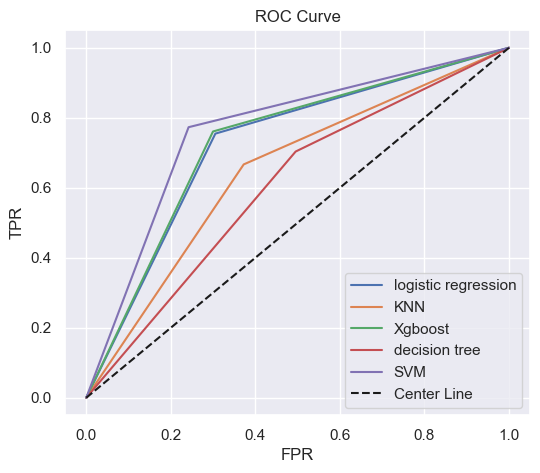

In [42]:
sns.set_theme()
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label="logistic regression")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_xg, tpr_xg, label="Xgboost")
plt.plot(fpr_dt, tpr_dt, label="decision tree")
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot([0, 1], [0, 1], 'k--', label='Center Line')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## precision recall curve 

In [37]:
precision_lr, recall_lr, thresholds = metrics.precision_recall_curve(y_test, lr_best_model.predict(x_test))
precision_knn, recall_knn, thresholds = metrics.precision_recall_curve(y_test, knn_best_model.predict(x_test))
precision_xg, recall_xg, thresholds = metrics.precision_recall_curve(y_test, xg_best_model.predict(x_test))
precision_dt, recall_dt, thresholds = metrics.precision_recall_curve(y_test, dt_best_model.predict(x_test))
precision_svm, recall_svm, thresholds = metrics.precision_recall_curve(y_test, svm_best_model.predict(x_test))

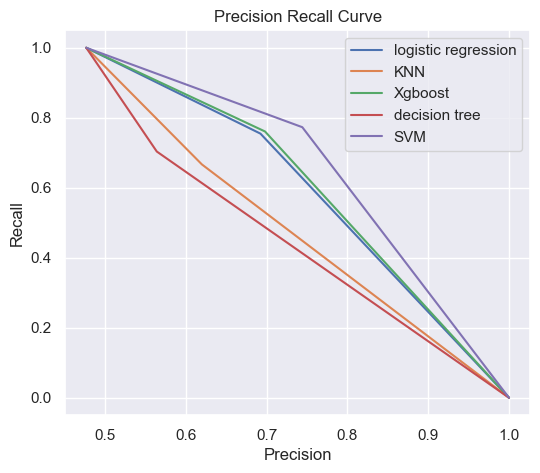

In [43]:
sns.set_theme()
plt.figure(figsize=(6, 5))
plt.plot(precision_lr, recall_lr, label="logistic regression")
plt.plot(precision_knn, recall_knn, label="KNN")
plt.plot(precision_xg, recall_xg, label="Xgboost")
plt.plot(precision_dt, recall_dt, label="decision tree")
plt.plot(precision_svm, recall_svm, label="SVM")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

## best model base on each metric 

In [39]:
accuracy = []
f1 = []
precision = []
recall = []
models = [lr_best_model, xg_best_model, 
          dt_best_model, knn_best_model, 
          svm_best_model]
names = ["Logistic Regression", "XGboost", 
         "Decision Tree", "k nearest neighbor", 
         "support vector machine"]

In [40]:
for model in models:
    preds = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, preds))
    f1.append(f1_score(y_test, preds))
    precision.append(precision_score(y_test, preds))
    recall.append(recall_score(y_test, preds))
    

In [41]:
print(names[np.argmax(accuracy)] + f" has highest accuracy and is equal to {max(accuracy)}")
print(names[np.argmax(f1)] + f" has highest f1 and is equal to {max(f1)}")
print(names[np.argmax(precision)] + f" has highest precision and is equal to {max(precision)}")
print(names[np.argmax(recall)] + f" has highest recall and is equal to {max(recall)}")


support vector machine has highest accuracy and is equal to 0.7651072124756335
support vector machine has highest f1 and is equal to 0.7582748244734202
support vector machine has highest precision and is equal to 0.7440944881889764
support vector machine has highest recall and is equal to 0.7730061349693251
